In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
%cd /content/MyDrive/MyDrive/2023-1/3. Meteo fisica/Datos-rayos

/content/MyDrive/MyDrive/2023-1/3. Meteo fisica/Datos-rayos


In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import glob as glb

# Viendo las correlaciones

In [ ]:
files = sorted(glb.glob("Correlaciones_rayos/*csv"))
files

['Correlaciones_rayos/Correlacion_Cape.csv',
 'Correlaciones_rayos/Correlacion_Cbh.csv',
 'Correlaciones_rayos/Correlacion_Cin.csv',
 'Correlaciones_rayos/Correlacion_Cpp.csv',
 'Correlaciones_rayos/Correlacion_Crr.csv',
 'Correlaciones_rayos/Correlacion_K.csv',
 'Correlaciones_rayos/Correlacion_Tcc.csv',
 'Correlaciones_rayos/Correlacion_pp.csv']

In [ ]:
archivos = []
for file in files:
  df = pd.read_csv(file)
  df.drop('Unnamed: 0',axis="columns",inplace=True)
  archivos.append(df)

In [ ]:
combinaciones = []

# Realizar las combinaciones de los primeros 4 archivos
for i in range(0, 8, 2):
    comb = pd.merge(archivos[i], archivos[i+1], how="outer")
    combinaciones.append(comb)

# Realizar las combinaciones de las combinaciones anteriores
while len(combinaciones) > 1:
    new_combinaciones = []
    for i in range(0, len(combinaciones), 2):
        if i+1 < len(combinaciones):
            comb = pd.merge(combinaciones[i], combinaciones[i+1], how="outer")
            new_combinaciones.append(comb)
        else:
            # Agregar la combinación sin pareja (si hay un número impar de combinaciones)
            new_combinaciones.append(combinaciones[i])
    combinaciones = new_combinaciones

df_corr = combinaciones[0]

In [ ]:
df_corr

,Mes,Cape-Spearman,Cape-Kendall,Cape-Spearman_1,Cape-Kendall_1,Cbh-Spearman,Cbh-Kendall,Cbh-Spearman_1,Cbh-Kendall_1,Cin-Spearman,...,K-Spearman_1,K-Kendall_1,Tcc-Spearman,Tcc-Kendall,Tcc-Spearman_1,Tcc-Kendall_1,Total pp-Spearman,Total pp-Kendall,Total pp-Spearman_1,Total pp-Kendall_1
0,1,0.167535,0.137871,0.131374,0.102868,0.008632,0.007075,-0.103944,-0.080009,0.034748,...,0.151573,0.117891,0.029757,0.025124,-0.052867,-0.041051,0.131909,0.108330,0.103876,0.079294
1,2,0.170587,0.139280,0.003304,0.002818,0.055791,0.045734,0.089558,0.067757,0.011482,...,0.078242,0.054177,-0.005030,-0.004305,0.064823,0.050956,0.165967,0.135435,0.124752,0.094333
2,3,0.196814,0.160541,-0.109504,-0.078880,0.056659,0.046473,0.084750,0.065535,0.000886,...,0.134369,0.102557,0.025439,0.021556,-0.012821,-0.010510,0.189089,0.154291,0.033011,0.025210
3,4,0.133650,0.110247,0.039544,0.030679,0.058198,0.047862,0.080604,0.061585,0.036537,...,0.310790,0.240105,-0.002124,-0.001748,-0.037970,-0.025628,0.134018,0.110436,0.195662,0.147882
4,5,0.035433,0.029940,0.432883,0.354564,0.044748,0.036672,-0.105299,-0.079528,0.054312,...,0.421436,0.343400,-0.013583,-0.011117,0.070061,0.057286,0.062398,0.052355,0.345136,0.271022
5,6,0.071299,0.062652,0.466639,0.378441,0.017765,0.014585,0.394604,0.308697,-0.092469,...,0.600033,0.470284,0.019603,0.016009,-0.191216,-0.164842,0.063733,0.056077,0.271619,0.212256
6,7,0.094227,0.086797,NaN,NaN,0.021694,0.017780,NaN,NaN,0.113228,...,NaN,NaN,0.063314,0.051928,NaN,NaN,0.094707,0.087495,NaN,NaN
7,8,0.067328,0.058995,0.373836,0.307255,0.037320,0.030543,-0.156853,-0.134236,-0.090603,...,0.059413,0.046844,0.021509,0.017566,-0.081834,-0.073612,0.066363,0.057400,0.177426,0.142116
8,9,0.075832,0.064860,0.121207,0.096103,0.022529,0.018483,0.032536,0.028600,-0.041408,...,0.270306,0.221262,0.014339,0.011745,0.059973,0.051408,0.076408,0.063989,0.120769,0.098151
9,10,0.138337,0.115054,-0.023780,-0.019549,0.045783,0.037561,0.119744,0.091011,0.016252,...,0.051891,0.041314,0.014844,0.012187,0.060171,0.048459,0.122381,0.101450,-0.048105,-0.034913


## Spearman

In [ ]:
df_corr.columns

Index(['Mes', 'Cape-Spearman', 'Cape-Kendall', 'Cape-Spearman_1',
       'Cape-Kendall_1', 'Cbh-Spearman', 'Cbh-Kendall', 'Cbh-Spearman_1',
       'Cbh-Kendall_1', 'Cin-Spearman', 'Cin-Kendall', 'Cin-Spearman_1',
       'Cin-Kendall_1', 'Cpp-Spearman', 'Cpp-Kendall', 'Cpp-Spearman_1',
       'Cpp-Kendall_1', 'Crr-Spearman', 'Crr-Kendall', 'Crr-Spearman_1',
       'Crr-Kendall_1', 'K-Spearman', 'K-Kendall', 'K-Spearman_1',
       'K-Kendall_1', 'Tcc-Spearman', 'Tcc-Kendall', 'Tcc-Spearman_1',
       'Tcc-Kendall_1', 'Total pp-Spearman', 'Total pp-Kendall',
       'Total pp-Spearman_1', 'Total pp-Kendall_1'],
      dtype='object')

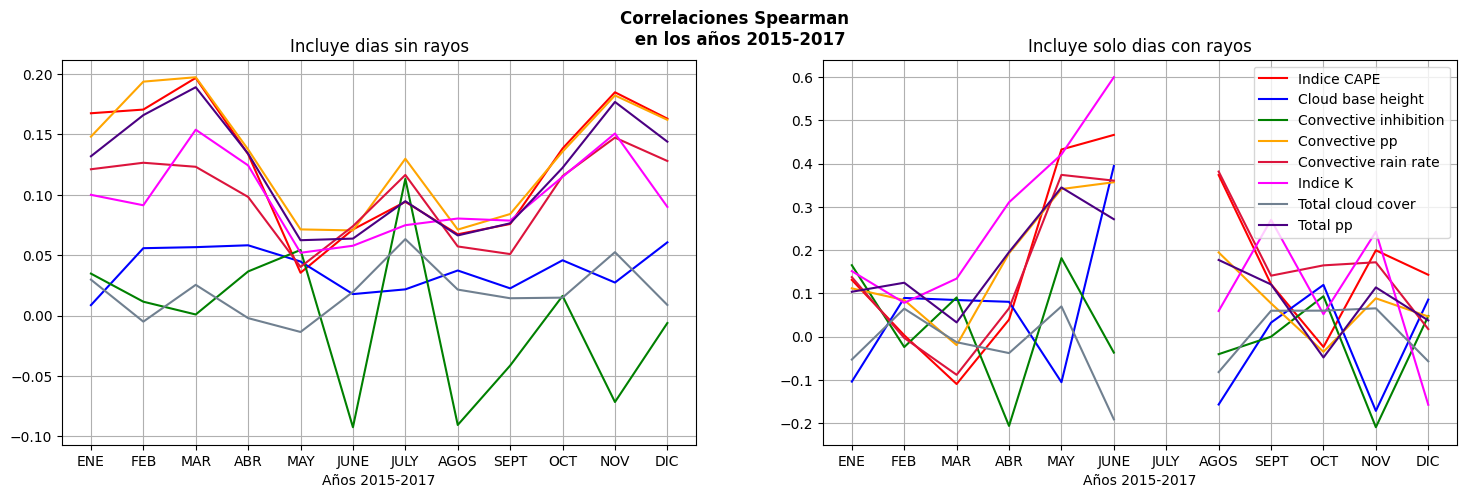

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle("Correlaciones Spearman \n en los años 2015-2017", fontweight="bold")
x=np.arange(1,13,1)
meses=["ENE","FEB", "MAR","ABR","MAY","JUNE","JULY","AGOS","SEPT","OCT","NOV","DIC"]

ax1 = axs[0]
ax1.plot(x,df_corr["Cape-Spearman"],label="Indice CAPE",color="red")
ax1.plot(x,df_corr["Cbh-Spearman"],label="Cloud base height",color="blue")
ax1.plot(x,df_corr["Cin-Spearman"],label="Convective inhibition",color="green")
ax1.plot(x,df_corr["Cpp-Spearman"],label="Convective pp",color="orange")
ax1.plot(x,df_corr["Crr-Spearman"],label="Convective rain rate",color="crimson")
ax1.plot(x,df_corr["K-Spearman"],label="Indice K",color="fuchsia")
ax1.plot(x,df_corr["Tcc-Spearman"],label="Total cloud cover",color="slategray")
ax1.plot(x,df_corr["Total pp-Spearman"],label="Total pp",color="indigo")
ax1.set_xticks(x,meses)
ax1.set_xlabel("Años 2015-2017")
ax1.grid()
ax1.set_title("Incluye dias sin rayos")

ax2 = axs[1]
ax2.plot(x,df_corr["Cape-Spearman_1"],label="Indice CAPE",color="red")
ax2.plot(x,df_corr["Cbh-Spearman_1"],label="Cloud base height",color="blue")
ax2.plot(x,df_corr["Cin-Spearman_1"],label="Convective inhibition",color="green")
ax2.plot(x,df_corr["Cpp-Spearman_1"],label="Convective pp",color="orange")
ax2.plot(x,df_corr["Crr-Spearman_1"],label="Convective rain rate",color="crimson")
ax2.plot(x,df_corr["K-Spearman_1"],label="Indice K",color="fuchsia")
ax2.plot(x,df_corr["Tcc-Spearman_1"],label="Total cloud cover",color="slategray")
ax2.plot(x,df_corr["Total pp-Spearman_1"],label="Total pp",color="indigo")
ax2.set_xticks(x,meses)
ax2.set_xlabel("Años 2015-2017")
ax2.set_title("Incluye solo dias con rayos")
ax2.grid()
ax2.legend()

## Kendall

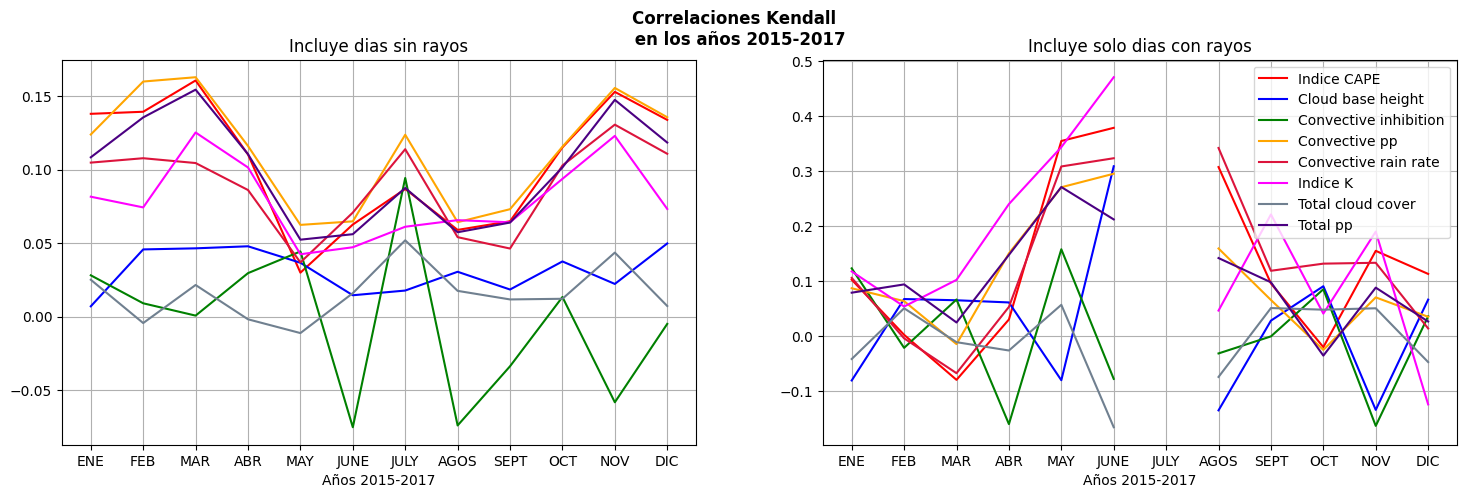

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle("Correlaciones Kendall \n en los años 2015-2017", fontweight="bold")
x=np.arange(1,13,1)
meses=["ENE","FEB", "MAR","ABR","MAY","JUNE","JULY","AGOS","SEPT","OCT","NOV","DIC"]

ax1 = axs[0]
ax1.plot(x,df_corr["Cape-Kendall"],label="Indice CAPE",color="red")
ax1.plot(x,df_corr["Cbh-Kendall"],label="Cloud base height",color="blue")
ax1.plot(x,df_corr["Cin-Kendall"],label="Convective inhibition",color="green")
ax1.plot(x,df_corr["Cpp-Kendall"],label="Convective pp",color="orange")
ax1.plot(x,df_corr["Crr-Kendall"],label="Convective rain rate",color="crimson")
ax1.plot(x,df_corr["K-Kendall"],label="Indice K",color="fuchsia")
ax1.plot(x,df_corr["Tcc-Kendall"],label="Total cloud cover",color="slategray")
ax1.plot(x,df_corr["Total pp-Kendall"],label="Total pp",color="indigo")
ax1.set_xticks(x,meses)
ax1.set_xlabel("Años 2015-2017")
ax1.grid()
ax1.set_title("Incluye dias sin rayos")

ax2 = axs[1]
ax2.plot(x,df_corr["Cape-Kendall_1"],label="Indice CAPE",color="red")
ax2.plot(x,df_corr["Cbh-Kendall_1"],label="Cloud base height",color="blue")
ax2.plot(x,df_corr["Cin-Kendall_1"],label="Convective inhibition",color="green")
ax2.plot(x,df_corr["Cpp-Kendall_1"],label="Convective pp",color="orange")
ax2.plot(x,df_corr["Crr-Kendall_1"],label="Convective rain rate",color="crimson")
ax2.plot(x,df_corr["K-Kendall_1"],label="Indice K",color="fuchsia")
ax2.plot(x,df_corr["Tcc-Kendall_1"],label="Total cloud cover",color="slategray")
ax2.plot(x,df_corr["Total pp-Kendall_1"],label="Total pp",color="indigo")
ax2.set_xticks(x,meses)
ax2.set_xlabel("Años 2015-2017")
ax2.set_title("Incluye solo dias con rayos")
ax2.grid()
ax2.legend()

In [ ]:
!pip freeze > requirements_notebookX.txt